In [2]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import hdbscan
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors


In [3]:
df = pd.read_csv('customer_learning.csv')
df

,action_month,user_id,watch_minute,course,broadcast,playback
0,2021-01,2,15.17,0,14.17,1
1,2021-01,13,4.00,0,4.00,0
2,2021-01,23,5.00,0,5.00,0
3,2021-01,45,1.00,0,1.00,0
4,2021-01,50,12.00,0,0.00,12
...,...,...,...,...,...,...
761246,2023-09,763511,3.00,0,3.00,0
761247,2023-09,763513,23.00,0,23.00,0
761248,2023-09,763596,4.00,2,0.00,2
761249,2023-09,763603,29.00,28,0.00,1


In [4]:
df['action_month'] = pd.to_datetime(df['action_month'], format='%Y-%m')

In [29]:
# 筛选学习时长大于30的
filtered_df = df.loc[df['watch_minute'] >= 5]
filtered_df.head()

,action_month,user_id,watch_minute,course,broadcast,playback
0,2021-01-01,2,15.17,0,14.17,1
2,2021-01-01,23,5.00,0,5.00,0
4,2021-01-01,50,12.00,0,0.00,12
8,2021-01-01,119,436.58,331,105.58,0
9,2021-01-01,125,50.00,50,0.00,0


In [26]:
# 计算用户的rfm
current_date = pd.to_datetime('2023-10-01')  #设置当前时间

rfm = filtered_df.groupby('user_id').agg({
    'action_month': lambda x: (current_date.year - x.max().year) * 12 + current_date.month - x.max().month,
    'user_id': 'count',
    'watch_minute': 'sum'
}).rename(columns={
    'action_month': 'Recency',
    'user_id': 'Frequency',
    'watch_minute': 'Monetary'
})

rfm.head()

,Recency,Frequency,Monetary
user_id,,,
2,2,16,2431.08
15,18,4,377.00
34,29,1,58.00
50,13,3,204.28
57,1,6,1922.99


In [27]:
import pandas as pd

def calculate_users(rfm, frequency_bins, monetary_bins):
    """
    Calculate the number of users for each (Recency, Frequency) bin.

    Parameters:
    - rfm_data (pd.DataFrame): DataFrame containing the RFM data.
    - recency_bins (list of int): List of bins for Recency.
    - frequency_bins (list of int): List of bins for Frequency.

    Returns:
    pd.DataFrame: A DataFrame where each element is the number of users in
                  the corresponding (Recency, Frequency) bin.
    """
    # Create an empty DataFrame to store the results
    result = pd.DataFrame(index=monetary_bins, columns=frequency_bins, dtype=int)
    
    # Calculate the number of users for each (Recency, Frequency) bin
    for frequency in frequency_bins:
        for monetary in monetary_bins:
            condition = (rfm['Frequency'] >= frequency) & (rfm['Monetary'] >= monetary)
            result.loc[monetary, frequency] = rfm[condition].shape[0]
    
    return result



In [28]:
frequency_bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
monetary_bins = [30, 60, 100, 500, 1000, 2000, 5000, 10000, 20000]

result = calculate_users(rfm, frequency_bins, monetary_bins)

result

,1,2,3,4,5,6,7,8,9,10
30,63511.0,38021.0,27442.0,21397.0,17507.0,14719.0,12630.0,10956.0,9644.0,8507.0
60,50236.0,38021.0,27442.0,21397.0,17507.0,14719.0,12630.0,10956.0,9644.0,8507.0
100,42061.0,36057.0,27434.0,21397.0,17507.0,14719.0,12630.0,10956.0,9644.0,8507.0
500,21598.0,21091.0,19789.0,18019.0,16132.0,14193.0,12471.0,10912.0,9635.0,8507.0
1000,15292.0,15151.0,14674.0,13962.0,13040.0,12042.0,11059.0,10096.0,9192.0,8272.0
2000,9873.0,9856.0,9771.0,9596.0,9292.0,8900.0,8486.0,8078.0,7601.0,7093.0
5000,4532.0,4532.0,4528.0,4515.0,4484.0,4439.0,4391.0,4321.0,4230.0,4129.0
10000,2150.0,2150.0,2150.0,2150.0,2150.0,2145.0,2139.0,2127.0,2111.0,2096.0
20000,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,799.0,799.0


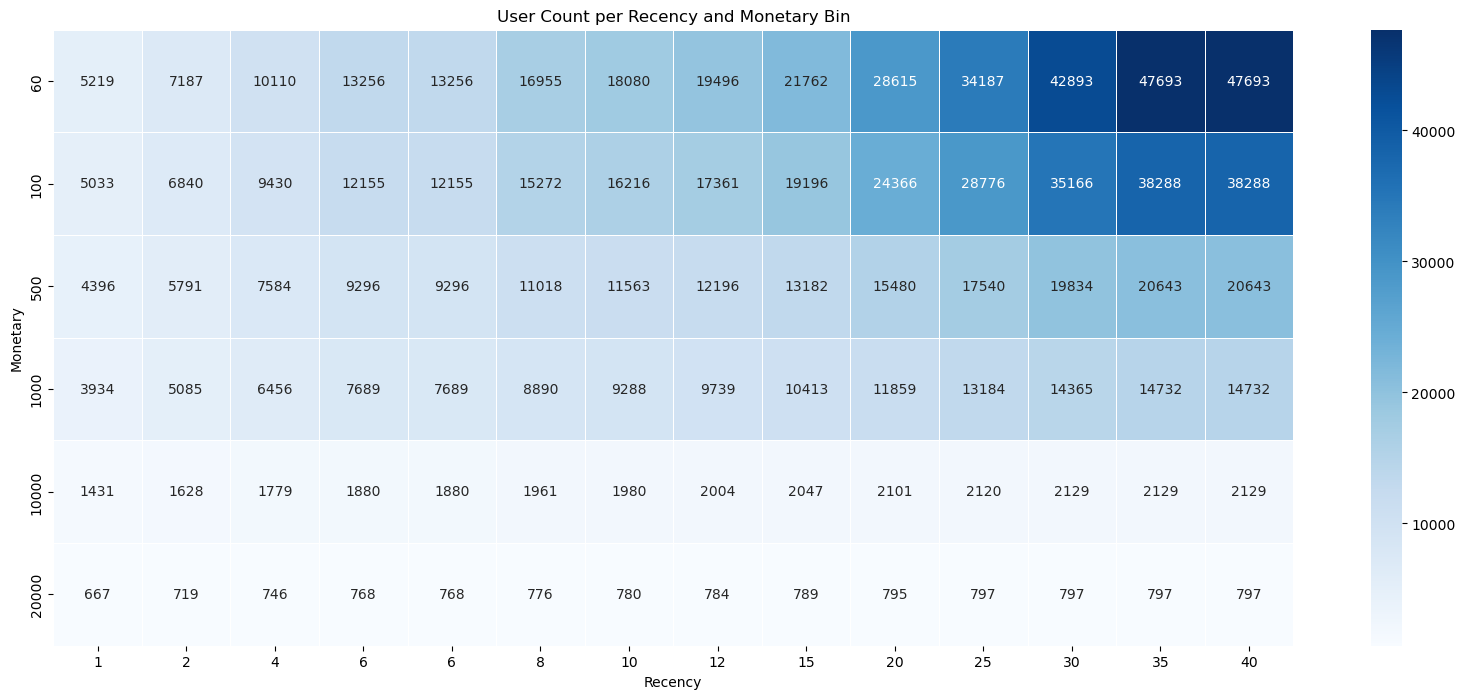

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def generate_heatmap(data, title='Heatmap', xlabel='Recency', ylabel='Monetary', cmap='Blues'):
    """
    Generate a heatmap using seaborn.

    Parameters:
    - data (pd.DataFrame): The data to visualize.
    - title (str): The title of the heatmap. Default is 'Heatmap'.
    - xlabel (str): The label for the x-axis. Default is 'X Label'.
    - ylabel (str): The label for the y-axis. Default is 'Y Label'.
    - cmap (str): The colormap to use. Default is 'Blues'.
    """
    # 设置图形的大小
    plt.figure(figsize=(20, 8))
    
    # 创建一个热力图
    sns.heatmap(result, annot=True, cmap=cmap, fmt='.0f', linewidths=.5)
    
    # 添加标题和轴标签
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # 显示图形
    plt.show()

# 使用函数
# 请注意，我们假设数据已经被正确地格式化，并且索引/列标签已经被设置。
# generate_heatmap(your_data, 'Your Title', 'Your X Label', 'Your Y Label')

generate_heatmap(result, 'User Count per Recency and Monetary Bin', 'Recency', 'Monetary')

In [57]:
rfm.head()

,Recency,Frequency,Monetary
user_id,,,
2,2,12,2235.15
15,18,3,328.00
50,13,2,159.28
57,1,5,1865.99
82,25,1,501.39


In [58]:

from lifetimes import BetaGeoFitter
from lifetimes.utils import calibration_and_holdout_data
from lifetimes.utils import summary_data_from_transaction_data
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.plotting import plot_history_alive
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
import warnings

warnings.filterwarnings('ignore')

In [90]:
# 计算用户的T
current_date = pd.to_datetime('2023-10-01')  #设置当前时间

df_rfm = filtered_df.groupby('user_id').agg({
    'action_month': lambda x: (current_date.year - x.min().year) * 12 + current_date.month - x.min().month
}).rename(columns={
    'action_month': 'T'
})

df_rfm.head()

,T
user_id,
2,30
15,20
50,30
57,29
82,25


In [91]:
df_rfm = pd.merge(rfm, df_rfm, on='user_id')

In [92]:
df_rfm.head()

,Recency,Frequency,Monetary,T
user_id,,,,
2,2,12,2235.15,30
15,18,3,328.00,20
50,13,2,159.28,30
57,1,5,1865.99,29
82,25,1,501.39,25


In [93]:
df_rfm = df_rfm.rename(columns={
    'Recency': 'recency',
    'Frequency': 'frequency',
    'Monetary': 'monetary_value'
})

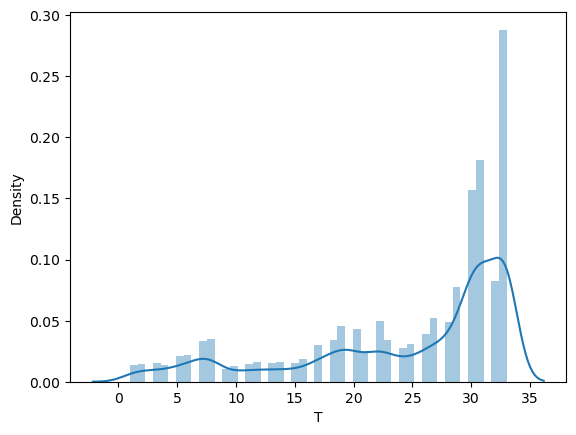

In [94]:
# 通过可视化查看Tenure的分布情况,此处是用户第一次产生订单的时间与当前统计截至时间的天数 
ax = sns.distplot(df_rfm['T'])

In [95]:
# 适配BG/NBD模型 （Beta Geometric Negative Binomial Distribution ）

bgf = BetaGeoFitter(penalizer_coef=0.002)
bgf.fit(df_rfm['frequency'], df_rfm['recency'], df_rfm['T'])
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.312356,0.001692,0.309039,0.315673
alpha,0.172851,0.001829,0.169267,0.176436
a,0.791437,0.008692,0.774400,0.808473
b,4.495634,0.045674,4.406113,4.585156


<AxesSubplot:title={'center':'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

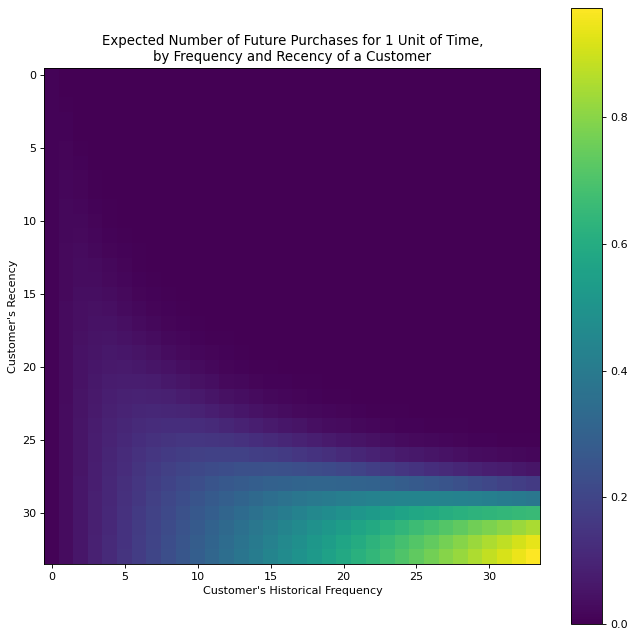

In [96]:
# 可视化结果
from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

plot_frequency_recency_matrix(bgf)

<AxesSubplot:title={'center':'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

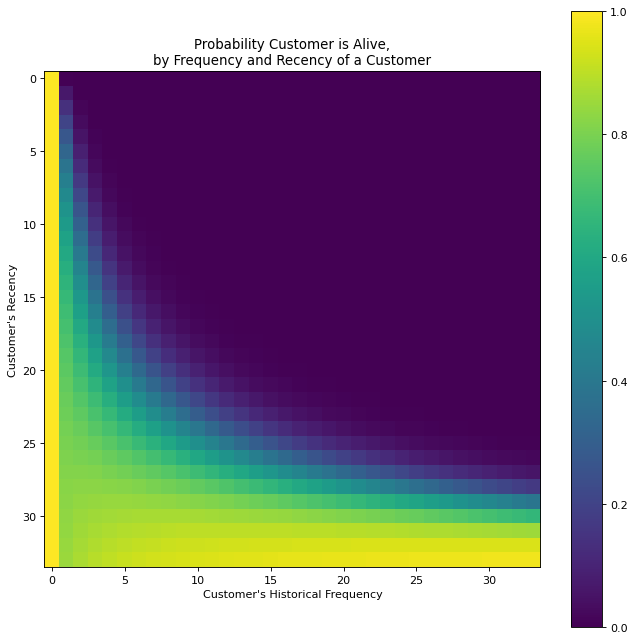

In [97]:
# 绘制每个客户留存的概率

figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

plot_probability_alive_matrix(bgf)

In [104]:
# 接下来预测未来每一个用户可能产生的订单数

t = 30
df_rfm['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, 
                                                                                      df_rfm['frequency'], 
                                                                                      df_rfm['recency'], 
                                                                                      df_rfm['T'])


In [105]:
df_rfm.sort_values(by='predicted_purchases').tail(5)

,recency,frequency,monetary_value,T,predicted_purchases
user_id,,,,,
481980,1,1,405.0,1,10.083225
481538,1,1,77.0,1,10.083225
241399,1,1,70.0,1,10.083225
55866,1,1,98.7,1,10.083225
763457,1,1,99.0,1,10.083225


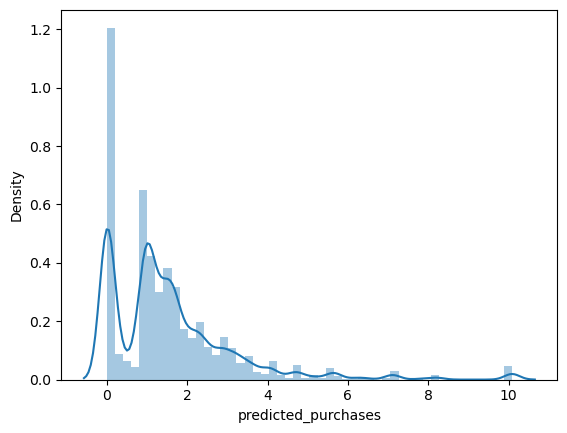

In [106]:
# 绘制预测的结果图形
ax = sns.distplot(df_rfm['predicted_purchases'])

<AxesSubplot:title={'center':'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

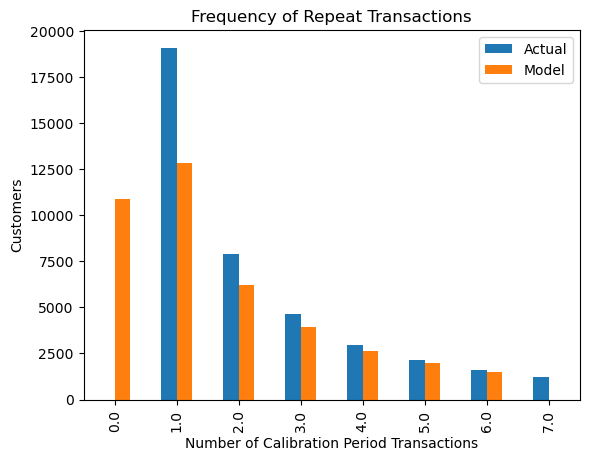

In [107]:
# 对比实际的数据，查看预测模型的准确性如何

plot_period_transactions(bgf)

In [109]:
df_rfm['predicted_purchases'].head()

user_id
2     1.617358e-12
15    3.324125e+00
50    1.000649e+00
57    1.846594e-06
82    1.152222e+00
Name: predicted_purchases, dtype: float64

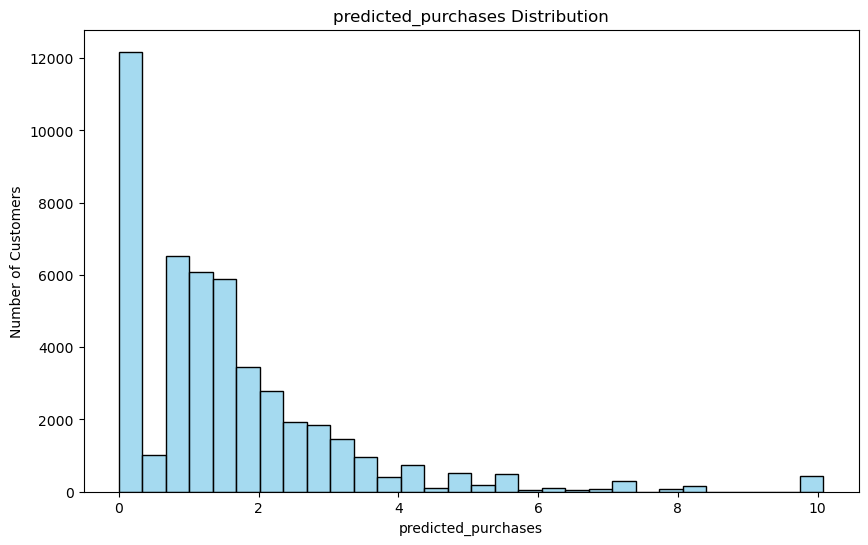

In [110]:
# Frequency分布图

fig1, ax1 = plt.subplots(figsize=(10, 6))
sns.histplot(df_rfm['predicted_purchases'], kde=False, ax=ax1, bins=30, color='skyblue')
ax1.set_title('predicted_purchases Distribution')
ax1.set_xlabel('predicted_purchases')
ax1.set_ylabel('Number of Customers')
plt.show()

In [112]:
# 预测 CLV
returning_customers = df_rfm[ (df_rfm['frequency'] > 0) & (df_rfm['monetary_value'] > 0)]
returning_customers.sort_values(by='monetary_value', ascending=False).head()

,recency,frequency,monetary_value,T,predicted_purchases
user_id,,,,,
344350,1,31,130767.75,31,2.511971e-42
472674,1,33,113097.66,33,4.792220e-46
118328,1,33,91273.74,33,4.792220e-46
147073,1,33,90330.19,33,4.792220e-46
452189,1,33,89582.32,33,4.792220e-46


In [113]:
returning_customers[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.793939
frequency,0.793939,1.000000
